In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec
from matplotlib.ticker import ScalarFormatter
import matplotlib.cm as cm
import math
from scipy.stats.mstats import gmean
from scipy.stats import gamma,poisson,linregress,beta,norm
from scipy import optimize
from scipy import interpolate
import time
import random
import pickle as pkl
from craterdata import *
%matplotlib inline

In [2]:
synth_area=10000
synth_age=2.0
ds = np.loadtxt('../data/example_synthetic.csv')

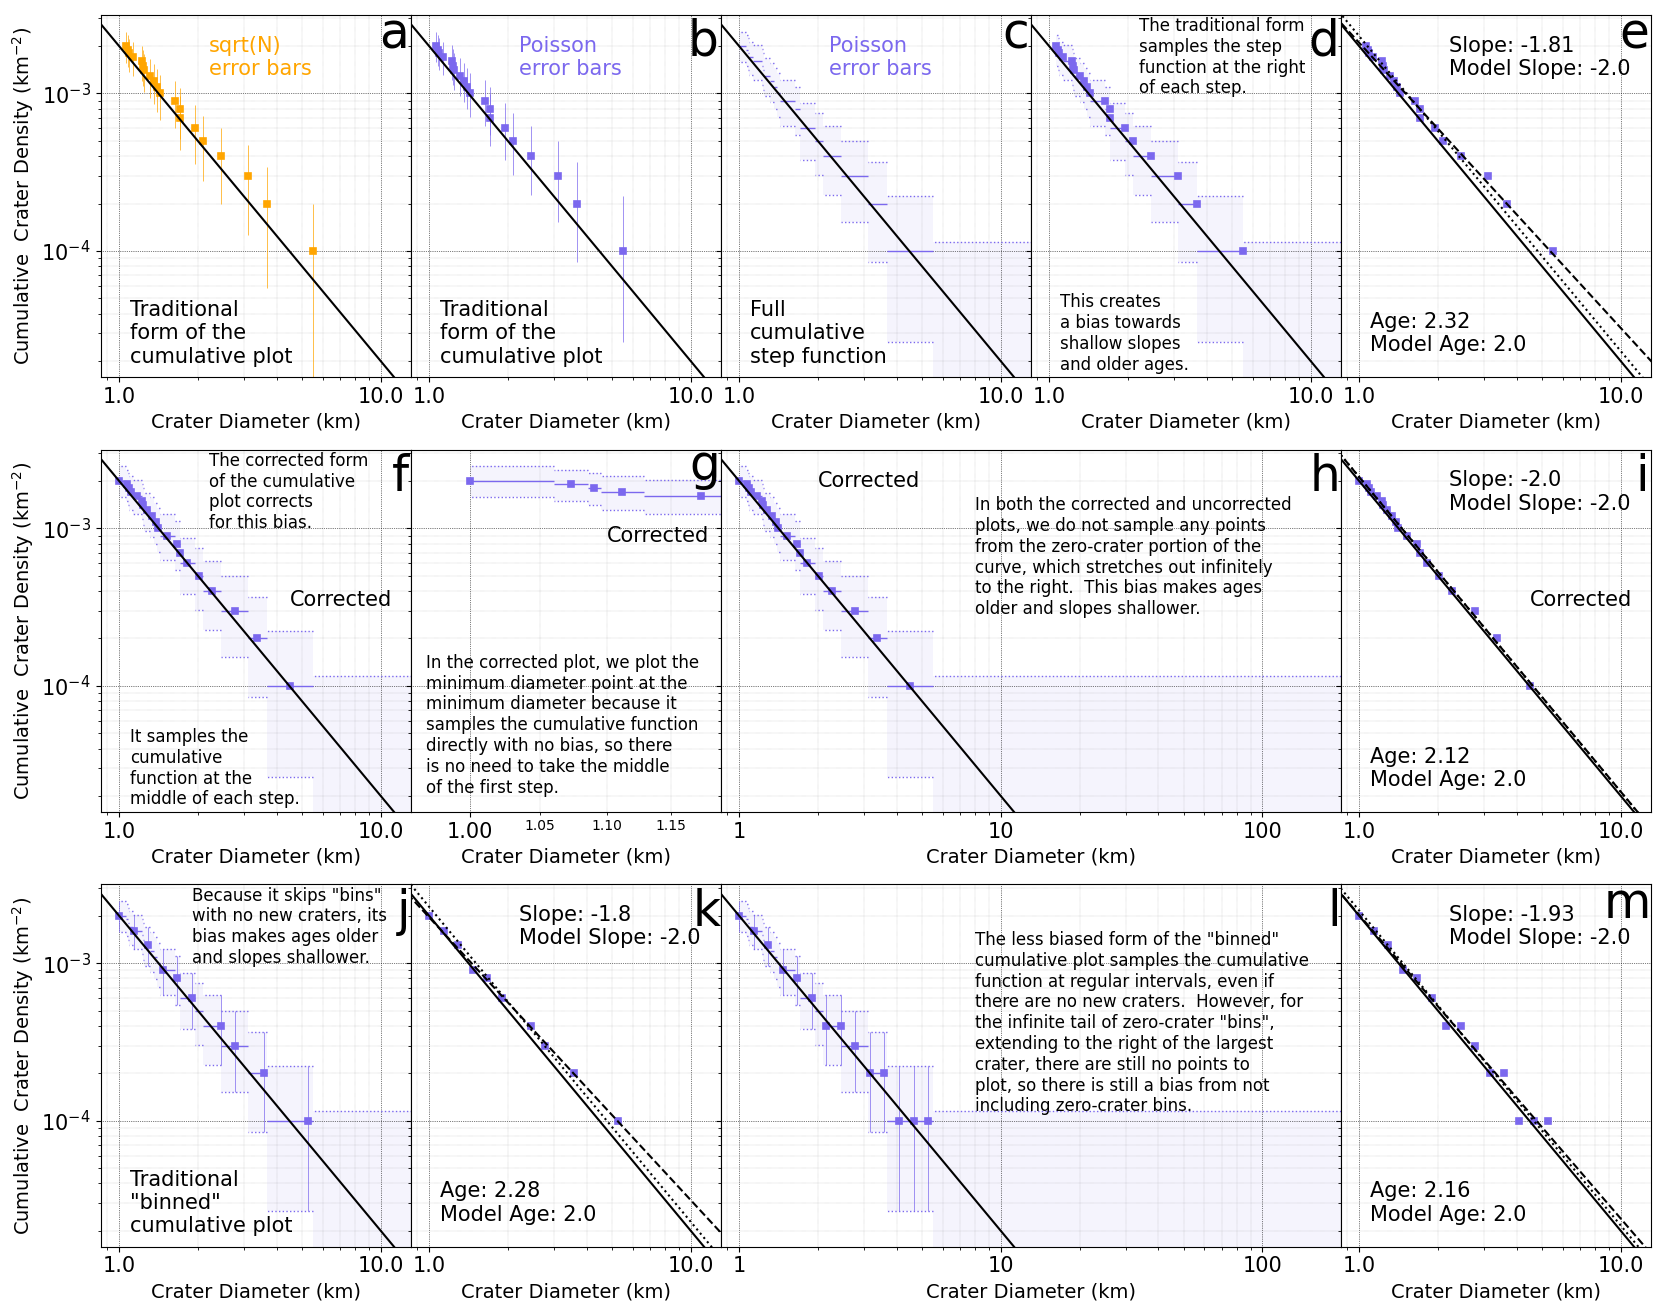

In [3]:
d_array, density_array = fast_calc_cumulative_unbinned(ds, synth_area)
bin_array, density_array_binned = fast_calc_cumulative_binned( 
                       ds, synth_area, reference_point=1.0, 
                       start_at_reference_point=False,
                       skip_zero_crater_bins=True)
bin_array_full, density_array_binned_full = fast_calc_cumulative_binned(
                       ds, synth_area, reference_point=1.0, 
                       start_at_reference_point=False,
                       skip_zero_crater_bins=False)
sds, median_array, lower, upper = fast_calc_cumulative_unbinned(
    ds, synth_area, kind='median', calculate_uncertainties=True
)

m, b = fit_linear(d_array, density_array)
m_med, b_med = fit_linear(d_array, median_array)
m_c, b_c = fit_linear(center_cumulative_points(d_array, d_min=1.0), 
                      density_array)
m_binned, b_binned = fit_linear(bin_array, density_array_binned)
m_binned_full, b_binned_full = fit_linear(bin_array_full, 
                                          density_array_binned_full)

age = fit_production_function(d_array, density_array)
age_med = fit_production_function(d_array, median_array)
age_c = fit_production_function(center_cumulative_points(d_array, 
                                             d_min=1.0), density_array)
age_binned = fit_production_function(bin_array, density_array_binned)
age_binned_full = fit_production_function(bin_array_full, 
                                          density_array_binned_full)

fig = plt.figure(figsize=(20, 16))

# Define the grid layout using gridspec
gs = gridspec.GridSpec(3, 5, figure=fig)

labelx, labely, labelsize = 12.8, 10**-2.52, 35
labely_small = 10**-2.47

D = 10**np.arange(-1, 3, 0.1)

ax = plt.subplot(gs[0, 0])
plot_cumulative_unbinned(
    ds, synth_area, plot_point_error_bars=True, 
    plot_points=True, kind='sqrt(N)',
    plot_lines=False, color='orange',
    do_formatting=True
)
plt.plot(D, synth_age * 10**loglog_linear_pf(N1=0.001, 
                             slope=-2)(np.log10(D)), color='black')
plt.xlim(0.85, 13)
plt.ylim(10**-4.8, 10**-2.5)
plt.xticks(size=15)
plt.yticks(size=15)
ax.xaxis.set_major_formatter(ScalarFormatter())
plt.text(1.1, 3E-5, 'Traditional\nform of the\ncumulative plot',
         ha='left', va='center', size=15)
plt.text(2.2, 1.7E-3, 'sqrt(N)\nerror bars', ha='left', 
         va='center', size=15, color='orange')
plt.text(labelx, labely_small, 'a', ha='right', va='top', size=labelsize)

ax = plt.subplot(gs[0, 1])
plot_cumulative_unbinned(
    ds, synth_area, plot_point_error_bars=True,
    plot_points=True, plot_lines=False, 
    color='mediumslateblue', do_formatting=True
)
plt.plot(D, synth_age * 10**loglog_linear_pf(N1=0.001, 
                             slope=-2)(np.log10(D)), color='black')
plt.xlim(0.85, 13)
plt.ylim(10**-4.8, 10**-2.5)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel(None)
ax.xaxis.set_major_formatter(ScalarFormatter())
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.text(1.1, 3E-5, 'Traditional\nform of the\ncumulative plot', 
         ha='left', va='center', size=15)
plt.text(2.2, 1.7E-3, 'Poisson\nerror bars', ha='left', va='center',
         size=15, color='mediumslateblue')
plt.text(labelx, labely, 'b', ha='right', va='top', size=labelsize)

ax = plt.subplot(gs[0, 2])
plot_cumulative_unbinned(
    ds, synth_area, plot_point_error_bars=False,
    center=True, d_min=1.0, color='mediumslateblue'
)
plt.plot(D, synth_age * 10**loglog_linear_pf(N1=0.001, slope=-2)(np.log10(D)), color='black')
plt.xlim(0.85, 13)
plt.ylim(10**-4.8, 10**-2.5)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel(None)
ax.xaxis.set_major_formatter(ScalarFormatter())
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.text(1.1, 3E-5, 'Full\ncumulative\nstep function', 
         ha='left', va='center', size=15)
plt.text(2.2, 1.7E-3, 'Poisson\nerror bars', ha='left', va='center',
         size=15, color='mediumslateblue')
plt.text(labelx, labely_small, 'c', ha='right', va='top', size=labelsize)

ax = plt.subplot(gs[0, 3])
plot_cumulative_unbinned(
    ds, synth_area, plot_point_error_bars=False, 
    plot_points=True, color='mediumslateblue'
)
plt.plot(D, synth_age * 10**loglog_linear_pf(N1=0.001, slope=-2)(np.log10(D)), color='black')
plt.xlim(0.85, 13)
plt.ylim(10**-4.8, 10**-2.5)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel(None)
ax.xaxis.set_major_formatter(ScalarFormatter())
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.text(1.1, 3E-5, 'This creates\na bias towards\nshallow slopes\nand older ages.', 
         ha='left', va='center', size=12)
plt.text(2.2, 1.7E-3, 'The traditional form\nsamples the step\nfunction at the right\nof each step.', 
         ha='left', va='center', size=12)
plt.text(labelx, labely, 'd', ha='right', va='top', size=labelsize)

ax = plt.subplot(gs[0, 4])
plot_cumulative_unbinned(
    ds, synth_area, plot_point_error_bars=False, 
    plot_points=True, color='mediumslateblue', plot_lines=False
)
plt.plot(D, synth_age * 10**loglog_linear_pf(N1=0.001, slope=-2)(np.log10(D)), color='black')
plt.plot(D, 10**(m * np.log10(D) + b), '--', color='black')
plt.plot(D, age * 10**loglog_linear_pf(N1=0.001, slope=-2)(np.log10(D)), ':', color='black')
plt.xlim(0.85, 13)
plt.ylim(10**-4.8, 10**-2.5)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel(None)
ax.xaxis.set_major_formatter(ScalarFormatter())
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.text(1.1, 3E-5, 'Age: ' + str(round(age, 2)) + '\nModel Age: ' + 
             str(round(synth_age, 2)), ha='left', va='center', size=15)
plt.text(2.2, 1.7E-3, 'Slope: ' + str(round(m, 2)) + '\nModel Slope: -2.0', 
         ha='left', va='center', size=15)
plt.text(labelx, labely_small, 'e', ha='right', va='top', size=labelsize)

ax = plt.subplot(gs[1, 0])
plot_cumulative_unbinned(ds, synth_area, plot_point_error_bars=False, plot_points=True,
                         center=True, d_min=1, color='mediumslateblue')
plt.plot(D, synth_age * 10**loglog_linear_pf(N1=0.001, slope=-2)(np.log10(D)), color='black')
plt.xlim(0.85, 13)
plt.ylim(10**-4.8, 10**-2.5)
plt.xticks(size=15)
plt.yticks(size=15)
ax.xaxis.set_major_formatter(ScalarFormatter())
plt.text(4.5, 3.5E-4, 'Corrected', 
             ha='left', va='center', size=15)
plt.text(1.1, 3E-5, 'It samples the\ncumulative\nfunction at the\nmiddle of each step.', 
         ha='left', va='center', size=12)
plt.text(2.2, 1.7E-3, 'The corrected form\nof the cumulative\nplot corrects\nfor this bias.', 
         ha='left', va='center', size=12)
plt.text(labelx, labely, 'f', ha='right', va='top', size=labelsize)

ax = plt.subplot(gs[1, 1])
plot_cumulative_unbinned(ds, synth_area, plot_point_error_bars=False, plot_points=True,
                         center=True, d_min=1, color='mediumslateblue')
plt.xlim(0.96, 1.19)
plt.ylim(10**-4.8, 10**-2.5)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel(None)
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.xaxis.set_minor_formatter(ScalarFormatter())
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.text(1.1, 9.0E-4, 'Corrected', 
             ha='left', va='center', size=15)
plt.text(0.97, 1.6E-4, 'In the corrected plot, we plot the\nminimum' + \
         ' diameter point at the\nminimum diameter because it\nsamples ' + \
         'the cumulative function\ndirectly with no bias, so there\n' + \
         'is no need to take the middle\nof the first step.', 
             ha='left', va='top', size=12)
plt.text(1.19, 10**-2.45, 'g', ha='right', va='top', size=labelsize)

ax = plt.subplot(gs[1, 2:4])
plot_cumulative_unbinned(
    ds, synth_area, plot_points=True, center=True, d_min=1, 
    color='mediumslateblue'
)
plt.plot(D, synth_age * 10**loglog_linear_pf(N1=0.001, slope=-2)(np.log10(D)), color='black')
plt.xlim(0.85, 13 * 13 / 0.85)
plt.ylim(10**-4.8, 10**-2.5)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel(None)
ax.xaxis.set_major_formatter(ScalarFormatter())
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.text(2.0, 2.0E-3, 'Corrected', 
             ha='left', va='center', size=15)
plt.text(8.0, 1.6E-3, 'In both the corrected and uncorrected\n' + \
                       'plots, we do not sample any points\n' + \
                       'from the zero-crater portion of the\n' + \
                       'curve, which stretches out infinitely\n' + \
                       'to the right.  This bias makes ages\n' + \
                       'older and slopes shallower.', 
                       ha='left', va='top', size=12)
plt.text(13 * 13 / 0.85, labely, 'h', ha='right', va='top', size=labelsize)

ax = plt.subplot(gs[1, 4])
plot_cumulative_unbinned(ds, synth_area, plot_point_error_bars=False, plot_points=True,
                         center=True, d_min=1, color='mediumslateblue', plot_lines=False)
plt.plot(D, synth_age * 10**loglog_linear_pf(N1=0.001, slope=-2)(np.log10(D)), color='black')
plt.plot(D, 10**(m_c * np.log10(D) + b_c), '--', color='black')
plt.plot(D, age_c * 10**loglog_linear_pf(N1=0.001, slope=-2)(np.log10(D)), ':', color='black')
plt.xlim(0.85, 13)
plt.ylim(10**-4.8, 10**-2.5)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel(None)
ax.xaxis.set_major_formatter(ScalarFormatter())
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.text(1.1, 3E-5, 'Age: ' + str(round(age_c, 2)) + '\nModel Age: ' + 
             str(round(synth_age, 2)), ha='left', va='center', size=15)
plt.text(2.2, 1.7E-3, 'Slope: ' + str(round(m_c, 2)) + '\nModel Slope: -2.0', 
             ha='left', va='center', size=15)
plt.text(4.5, 3.5E-4, 'Corrected', 
             ha='left', va='center', size=15)
plt.text(labelx, labely, 'i', ha='right', va='top', size=labelsize)

ax = plt.subplot(gs[2, 0])
plot_cumulative_unbinned(ds, synth_area, plot_point_error_bars=False,
                         center=True, d_min=1, color='mediumslateblue')
plot_cumulative_binned(ds, synth_area, color='mediumslateblue', skip_zero_crater_bins=True, 
                       reference_point=1.0, start_at_reference_point=True)
plt.plot(D, synth_age * 10**loglog_linear_pf(N1=0.001, slope=-2)(np.log10(D)), color='black')
plt.xlim(0.85, 13)
plt.ylim(10**-4.8, 10**-2.5)
plt.xticks(size=15)
plt.yticks(size=15)
ax.xaxis.set_major_formatter(ScalarFormatter())
plt.text(1.1, 3E-5, 'Traditional\n\"binned\"\ncumulative plot', 
         ha='left', va='center', size=15)
plt.text(1.9, 1.7E-3, 'Because it skips "bins"\nwith no new craters, its\n' + \
         'bias makes ages older\nand slopes shallower.', 
         ha='left', va='center', size=12)
plt.text(13, labely, 'j', ha='right', va='top', size=labelsize)

ax = plt.subplot(gs[2, 1])
plot_cumulative_binned(ds, synth_area, color='mediumslateblue', skip_zero_crater_bins=True, 
                       reference_point=1.0, start_at_reference_point=True,
                       plot_error_bars=False)
plt.plot(D, synth_age * 10**loglog_linear_pf(N1=0.001, slope=-2)(np.log10(D)), color='black')
plt.plot(D, 10**(m_binned * np.log10(D) + b_binned), '--', color='black')
plt.plot(D, age_binned * 10**loglog_linear_pf(N1=0.001, 
                    slope=-2)(np.log10(D)), ':', color='black')
plt.xlim(0.85, 13)
plt.ylim(10**-4.8, 10**-2.5)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel(None)
ax.xaxis.set_major_formatter(ScalarFormatter())
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.text(1.1, 3E-5, 'Age: ' + str(round(age_binned, 2)) + '\nModel Age: ' + 
             str(round(synth_age, 2)), ha='left', va='center', size=15)
plt.text(2.2, 1.7E-3, 'Slope: ' + str(round(m_binned, 2)) + '\nModel Slope: -2.0',
             ha='left', va='center', size=15)
plt.text(13, labely, 'k', ha='right', va='top', size=labelsize)

ax = plt.subplot(gs[2, 2:4])
plot_cumulative_unbinned(ds, synth_area, plot_point_error_bars=False,
                         center=True, d_min=1, color='mediumslateblue')
plot_cumulative_binned(ds, synth_area, color='mediumslateblue',
                       skip_zero_crater_bins=False, 
                       reference_point=1.0, start_at_reference_point=True,
                       d_max=13 * 13 / 0.85)
plt.plot(D, synth_age * 10**loglog_linear_pf(N1=0.001, slope=-2)(np.log10(D)), color='black')
plt.xlim(0.85, 13 * 13 / 0.85)
plt.ylim(10**-4.8, 10**-2.5)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel(None)
ax.xaxis.set_major_formatter(ScalarFormatter())
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.text(8.0, 1.6E-3, 'The less biased form of the "binned"\n' + \
                       'cumulative plot samples the cumulative\n' + \
                       'function at regular intervals, even if\n' + \
                       'there are no new craters.  However, for\n' + \
                       'the infinite tail of zero-crater "bins",\n' + \
                       'extending to the right of the largest\n' + \
                       'crater, there are still no points to\n' + \
                       'plot, so there is still a bias from not\n' +\
                       'including zero-crater bins.', 
                       ha='left', va='top', size=12)
plt.text(13 * 13 / 0.85, labely, 'l', ha='right', va='top', size=labelsize)

ax = plt.subplot(gs[2, 4])
plot_cumulative_binned(ds, synth_area, color='mediumslateblue', 
                       skip_zero_crater_bins=False, plot_error_bars=False,
                       reference_point=1.0, start_at_reference_point=True)
plt.plot(D, synth_age * 10**loglog_linear_pf(N1=0.001, 
                                slope=-2)(np.log10(D)), color='black')
plt.plot(D, 10**(m_binned_full * np.log10(D) + b_binned_full), '--', 
                    color='black')
plt.plot(D, age_binned_full * 10**loglog_linear_pf(N1=0.001, 
                    slope=-2)(np.log10(D)), ':', color='black')
plt.xlim(0.85, 13)
plt.ylim(10**-4.8, 10**-2.5)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel(None)
ax.xaxis.set_major_formatter(ScalarFormatter())
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.text(1.1, 3E-5, 'Age: ' + str(round(age_binned_full, 2)) + '\nModel Age: ' + 
             str(round(synth_age, 2)), ha='left', va='center', size=15)
plt.text(2.2, 1.7E-3, 'Slope: ' + str(round(m_binned_full, 2)) + '\nModel Slope: -2.0',
             ha='left', va='center', size=15)
plt.text(13, labely_small, 'm', ha='right', va='top', size=labelsize)

plt.subplots_adjust(wspace=0, hspace=0.2)
pfig = plt.gcf()
pfig.savefig('figs/synthetic_plotting_example.pdf', bbox_inches='tight')

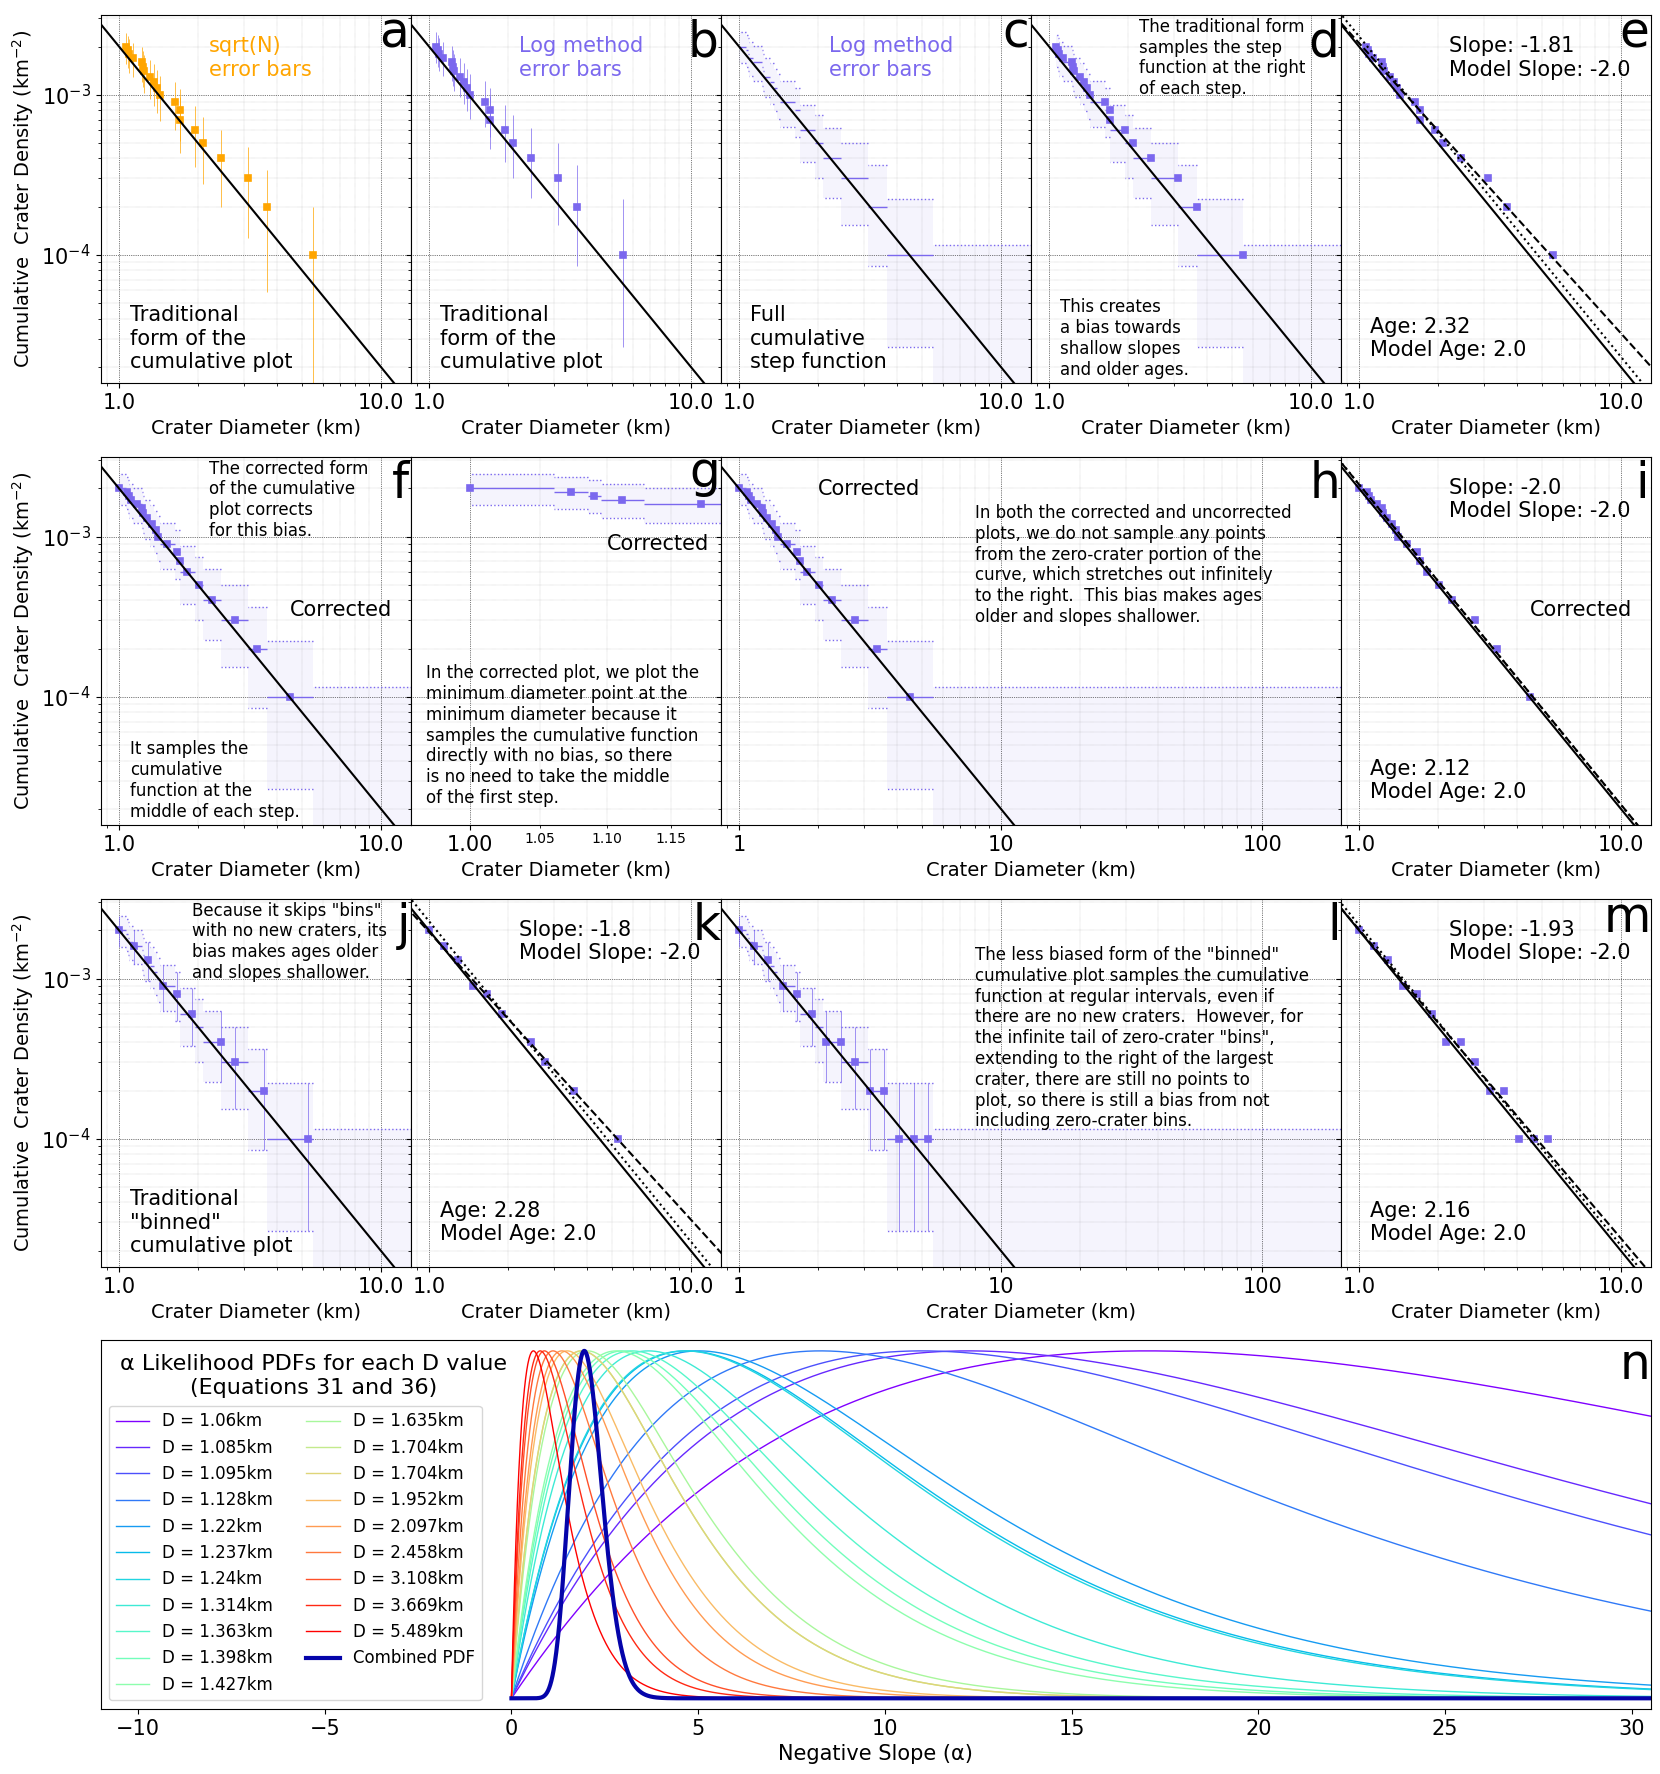

In [4]:
d_array, density_array = fast_calc_cumulative_unbinned(ds, synth_area)
bin_array, density_array_binned = fast_calc_cumulative_binned( 
                       ds, synth_area, reference_point=1.0, 
                       start_at_reference_point=False,
                       skip_zero_crater_bins=True)
bin_array_full, density_array_binned_full = fast_calc_cumulative_binned(
                       ds, synth_area, reference_point=1.0, 
                       start_at_reference_point=False,
                       skip_zero_crater_bins=False)
sds, median_array, lower, upper = fast_calc_cumulative_unbinned(
    ds, synth_area, kind='median', calculate_uncertainties=True
)

m, b = fit_linear(d_array, density_array)
m_med, b_med = fit_linear(d_array, median_array)
m_c, b_c = fit_linear(center_cumulative_points(d_array, d_min=1.0), 
                      density_array)
m_binned, b_binned = fit_linear(bin_array, density_array_binned)
m_binned_full, b_binned_full = fit_linear(bin_array_full, 
                                          density_array_binned_full)

age = fit_production_function(d_array, density_array)
age_med = fit_production_function(d_array, median_array)
age_c = fit_production_function(center_cumulative_points(d_array, 
                                             d_min=1.0), density_array)
age_binned = fit_production_function(bin_array, density_array_binned)
age_binned_full = fit_production_function(bin_array_full, 
                                          density_array_binned_full)

fig = plt.figure(figsize=(20, 22))

# Define the grid layout using gridspec
gs = gridspec.GridSpec(4, 5, figure=fig)

labelx, labely, labelsize = 12.8, 10**-2.52, 35
labely_small = 10**-2.47

D = 10**np.arange(-1, 3, 0.1)

ax = plt.subplot(gs[0, 0])
plot_cumulative_unbinned(
    ds, synth_area, plot_point_error_bars=True, 
    plot_points=True, kind='sqrt(N)',
    plot_lines=False, color='orange',
    do_formatting=True
)
plt.plot(D, synth_age * 10**loglog_linear_pf(N1=0.001, 
                             slope=-2)(np.log10(D)), color='black')
plt.xlim(0.85, 13)
plt.ylim(10**-4.8, 10**-2.5)
plt.xticks(size=15)
plt.yticks(size=15)
ax.xaxis.set_major_formatter(ScalarFormatter())
plt.text(1.1, 3E-5, 'Traditional\nform of the\ncumulative plot',
         ha='left', va='center', size=15)
plt.text(2.2, 1.7E-3, 'sqrt(N)\nerror bars', ha='left', 
         va='center', size=15, color='orange')
plt.text(labelx, labely_small, 'a', ha='right', va='top', size=labelsize)

ax = plt.subplot(gs[0, 1])
plot_cumulative_unbinned(
    ds, synth_area, plot_point_error_bars=True,
    plot_points=True, plot_lines=False, 
    color='mediumslateblue', do_formatting=True
)
plt.plot(D, synth_age * 10**loglog_linear_pf(N1=0.001, 
                             slope=-2)(np.log10(D)), color='black')
plt.xlim(0.85, 13)
plt.ylim(10**-4.8, 10**-2.5)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel(None)
ax.xaxis.set_major_formatter(ScalarFormatter())
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.text(1.1, 3E-5, 'Traditional\nform of the\ncumulative plot', 
         ha='left', va='center', size=15)
plt.text(2.2, 1.7E-3, 'Log method\nerror bars', ha='left', va='center',
         size=15, color='mediumslateblue')
plt.text(labelx, labely, 'b', ha='right', va='top', size=labelsize)

ax = plt.subplot(gs[0, 2])
plot_cumulative_unbinned(
    ds, synth_area, plot_point_error_bars=False,
    center=True, d_min=1.0, color='mediumslateblue'
)
plt.plot(D, synth_age * 10**loglog_linear_pf(N1=0.001, slope=-2)(np.log10(D)), color='black')
plt.xlim(0.85, 13)
plt.ylim(10**-4.8, 10**-2.5)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel(None)
ax.xaxis.set_major_formatter(ScalarFormatter())
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.text(1.1, 3E-5, 'Full\ncumulative\nstep function', 
         ha='left', va='center', size=15)
plt.text(2.2, 1.7E-3, 'Log method\nerror bars', ha='left', va='center',
         size=15, color='mediumslateblue')
plt.text(labelx, labely_small, 'c', ha='right', va='top', size=labelsize)

ax = plt.subplot(gs[0, 3])
plot_cumulative_unbinned(ds, synth_area, plot_point_error_bars=False, 
                         plot_points=True, color='mediumslateblue')
plt.plot(D, synth_age * 10**loglog_linear_pf(N1=0.001, slope=-2)(np.log10(D)), color='black')
plt.xlim(0.85, 13)
plt.ylim(10**-4.8, 10**-2.5)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel(None)
ax.xaxis.set_major_formatter(ScalarFormatter())
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.text(1.1, 3E-5, 'This creates\na bias towards\nshallow slopes\nand older ages.', 
         ha='left', va='center', size=12)
plt.text(2.2, 1.7E-3, 'The traditional form\nsamples the step\nfunction at the right\nof each step.', 
         ha='left', va='center', size=12)
plt.text(labelx, labely, 'd', ha='right', va='top', size=labelsize)

ax = plt.subplot(gs[0, 4])
plot_cumulative_unbinned(
    ds, synth_area, plot_point_error_bars=False, 
    plot_points=True, color='mediumslateblue', plot_lines=False
)
plt.plot(D, synth_age * 10**loglog_linear_pf(N1=0.001, slope=-2)(np.log10(D)), color='black')
plt.plot(D, 10**(m * np.log10(D) + b), '--', color='black')
plt.plot(D, age * 10**loglog_linear_pf(N1=0.001, slope=-2)(np.log10(D)), ':', color='black')
plt.xlim(0.85, 13)
plt.ylim(10**-4.8, 10**-2.5)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel(None)
ax.xaxis.set_major_formatter(ScalarFormatter())
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.text(1.1, 3E-5, 'Age: ' + str(round(age, 2)) + '\nModel Age: ' + 
             str(round(synth_age, 2)), ha='left', va='center', size=15)
plt.text(2.2, 1.7E-3, 'Slope: ' + str(round(m, 2)) + '\nModel Slope: -2.0', 
         ha='left', va='center', size=15)
plt.text(labelx, labely_small, 'e', ha='right', va='top', size=labelsize)

ax = plt.subplot(gs[1, 0])
plot_cumulative_unbinned(ds, synth_area, plot_point_error_bars=False, plot_points=True,
                         center=True, d_min=1, color='mediumslateblue')
plt.plot(D, synth_age * 10**loglog_linear_pf(N1=0.001, slope=-2)(np.log10(D)), color='black')
plt.xlim(0.85, 13)
plt.ylim(10**-4.8, 10**-2.5)
plt.xticks(size=15)
plt.yticks(size=15)
ax.xaxis.set_major_formatter(ScalarFormatter())
plt.text(4.5, 3.5E-4, 'Corrected', 
             ha='left', va='center', size=15)
plt.text(1.1, 3E-5, 'It samples the\ncumulative\nfunction at the\nmiddle of each step.', 
         ha='left', va='center', size=12)
plt.text(2.2, 1.7E-3, 'The corrected form\nof the cumulative\nplot corrects\nfor this bias.', 
         ha='left', va='center', size=12)
plt.text(labelx, labely, 'f', ha='right', va='top', size=labelsize)

ax = plt.subplot(gs[1, 1])
plot_cumulative_unbinned(ds, synth_area, plot_point_error_bars=False, plot_points=True,
                         center=True, d_min=1, color='mediumslateblue')
plt.xlim(0.96, 1.19)
plt.ylim(10**-4.8, 10**-2.5)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel(None)
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.xaxis.set_minor_formatter(ScalarFormatter())
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.text(1.1, 9.0E-4, 'Corrected', 
             ha='left', va='center', size=15)
plt.text(0.97, 1.6E-4, 'In the corrected plot, we plot the\nminimum' + \
         ' diameter point at the\nminimum diameter because it\nsamples ' + \
         'the cumulative function\ndirectly with no bias, so there\n' + \
         'is no need to take the middle\nof the first step.', 
             ha='left', va='top', size=12)
plt.text(1.19, 10**-2.45, 'g', ha='right', va='top', size=labelsize)

ax = plt.subplot(gs[1, 2:4])
plot_cumulative_unbinned(
    ds, synth_area, plot_points=True, center=True, d_min=1, 
    color='mediumslateblue'
)
plt.plot(D, synth_age * 10**loglog_linear_pf(N1=0.001, slope=-2)(np.log10(D)), color='black')
plt.xlim(0.85, 13 * 13 / 0.85)
plt.ylim(10**-4.8, 10**-2.5)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel(None)
ax.xaxis.set_major_formatter(ScalarFormatter())
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.text(2.0, 2.0E-3, 'Corrected', 
             ha='left', va='center', size=15)
plt.text(8.0, 1.6E-3, 'In both the corrected and uncorrected\n' + \
                       'plots, we do not sample any points\n' + \
                       'from the zero-crater portion of the\n' + \
                       'curve, which stretches out infinitely\n' + \
                       'to the right.  This bias makes ages\n' + \
                       'older and slopes shallower.', 
                       ha='left', va='top', size=12)
plt.text(13 * 13 / 0.85, labely, 'h', ha='right', va='top', size=labelsize)

ax = plt.subplot(gs[1, 4])
plot_cumulative_unbinned(ds, synth_area, plot_point_error_bars=False, plot_points=True,
                         center=True, d_min=1, color='mediumslateblue', plot_lines=False)
plt.plot(D, synth_age * 10**loglog_linear_pf(N1=0.001, slope=-2)(np.log10(D)), color='black')
plt.plot(D, 10**(m_c * np.log10(D) + b_c), '--', color='black')
plt.plot(D, age_c * 10**loglog_linear_pf(N1=0.001, slope=-2)(np.log10(D)), ':', color='black')
plt.xlim(0.85, 13)
plt.ylim(10**-4.8, 10**-2.5)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel(None)
ax.xaxis.set_major_formatter(ScalarFormatter())
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.text(1.1, 3E-5, 'Age: ' + str(round(age_c, 2)) + '\nModel Age: ' + 
             str(round(synth_age, 2)), ha='left', va='center', size=15)
plt.text(2.2, 1.7E-3, 'Slope: ' + str(round(m_c, 2)) + '\nModel Slope: -2.0', 
             ha='left', va='center', size=15)
plt.text(4.5, 3.5E-4, 'Corrected', 
             ha='left', va='center', size=15)
plt.text(labelx, labely, 'i', ha='right', va='top', size=labelsize)

ax = plt.subplot(gs[2, 0])
plot_cumulative_unbinned(ds, synth_area, plot_point_error_bars=False,
                         center=True, d_min=1, color='mediumslateblue')
plot_cumulative_binned(ds, synth_area, color='mediumslateblue', skip_zero_crater_bins=True, 
                       reference_point=1.0, start_at_reference_point=True)
plt.plot(D, synth_age * 10**loglog_linear_pf(N1=0.001, slope=-2)(np.log10(D)), color='black')
plt.xlim(0.85, 13)
plt.ylim(10**-4.8, 10**-2.5)
plt.xticks(size=15)
plt.yticks(size=15)
ax.xaxis.set_major_formatter(ScalarFormatter())
plt.text(1.1, 3E-5, 'Traditional\n\"binned\"\ncumulative plot', 
         ha='left', va='center', size=15)
plt.text(1.9, 1.7E-3, 'Because it skips "bins"\nwith no new craters, its\n' + \
         'bias makes ages older\nand slopes shallower.', 
         ha='left', va='center', size=12)
plt.text(13, labely, 'j', ha='right', va='top', size=labelsize)

ax = plt.subplot(gs[2, 1])
plot_cumulative_binned(ds, synth_area, color='mediumslateblue', skip_zero_crater_bins=True, 
                       reference_point=1.0, start_at_reference_point=True,
                       plot_error_bars=False)
plt.plot(D, synth_age * 10**loglog_linear_pf(N1=0.001, slope=-2)(np.log10(D)), color='black')
plt.plot(D, 10**(m_binned * np.log10(D) + b_binned), '--', color='black')
plt.plot(D, age_binned * 10**loglog_linear_pf(N1=0.001, 
                    slope=-2)(np.log10(D)), ':', color='black')
plt.xlim(0.85, 13)
plt.ylim(10**-4.8, 10**-2.5)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel(None)
ax.xaxis.set_major_formatter(ScalarFormatter())
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.text(1.1, 3E-5, 'Age: ' + str(round(age_binned, 2)) + '\nModel Age: ' + 
             str(round(synth_age, 2)), ha='left', va='center', size=15)
plt.text(2.2, 1.7E-3, 'Slope: ' + str(round(m_binned, 2)) + '\nModel Slope: -2.0',
             ha='left', va='center', size=15)
plt.text(13, labely, 'k', ha='right', va='top', size=labelsize)

ax = plt.subplot(gs[2, 2:4])
plot_cumulative_unbinned(ds, synth_area, plot_point_error_bars=False,
                         center=True, d_min=1, color='mediumslateblue')
plot_cumulative_binned(ds, synth_area, color='mediumslateblue',
                       skip_zero_crater_bins=False, 
                       reference_point=1.0, start_at_reference_point=True,
                       d_max=13 * 13 / 0.85)
plt.plot(D, synth_age * 10**loglog_linear_pf(N1=0.001, slope=-2)(np.log10(D)), color='black')
plt.xlim(0.85, 13 * 13 / 0.85)
plt.ylim(10**-4.8, 10**-2.5)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel(None)
ax.xaxis.set_major_formatter(ScalarFormatter())
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.text(8.0, 1.6E-3, 'The less biased form of the "binned"\n' + \
                       'cumulative plot samples the cumulative\n' + \
                       'function at regular intervals, even if\n' + \
                       'there are no new craters.  However, for\n' + \
                       'the infinite tail of zero-crater "bins",\n' + \
                       'extending to the right of the largest\n' + \
                       'crater, there are still no points to\n' + \
                       'plot, so there is still a bias from not\n' +\
                       'including zero-crater bins.', 
                       ha='left', va='top', size=12)
plt.text(13 * 13 / 0.85, labely, 'l', ha='right', va='top', size=labelsize)

ax = plt.subplot(gs[2, 4])
plot_cumulative_binned(ds, synth_area, color='mediumslateblue', 
                       skip_zero_crater_bins=False, plot_error_bars=False,
                       reference_point=1.0, start_at_reference_point=True)
plt.plot(D, synth_age * 10**loglog_linear_pf(N1=0.001, 
                                slope=-2)(np.log10(D)), color='black')
plt.plot(D, 10**(m_binned_full * np.log10(D) + b_binned_full), '--', 
                    color='black')
plt.plot(D, age_binned_full * 10**loglog_linear_pf(N1=0.001, 
                    slope=-2)(np.log10(D)), ':', color='black')
plt.xlim(0.85, 13)
plt.ylim(10**-4.8, 10**-2.5)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel(None)
ax.xaxis.set_major_formatter(ScalarFormatter())
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.text(1.1, 3E-5, 'Age: ' + str(round(age_binned_full, 2)) + '\nModel Age: ' + 
             str(round(synth_age, 2)), ha='left', va='center', size=15)
plt.text(2.2, 1.7E-3, 'Slope: ' + str(round(m_binned_full, 2)) + '\nModel Slope: -2.0',
             ha='left', va='center', size=15)
plt.text(13, labely_small, 'm', ha='right', va='top', size=labelsize)

ax = plt.subplot(gs[3, :5])
alpha = np.linspace(1E-5, 100, 10000)
colors = cm.rainbow(np.linspace(0, 1, ds.shape[0]))
for i in range(ds.shape[0]):
    Pi = pareto_P(ds[i], alpha, dmin=1)
    plt.plot(
        alpha, Pi / Pi.max(), lw=1, 
        c=colors[i], label='D = ' + str(np.round(ds[i], 3)) + 'km'
    )
P = pareto_P(ds, alpha, dmin=1)
plt.plot(
    alpha, P / P.max(), c=cs[2], lw=3,
    label='Combined PDF'
)
plt.yticks([])
plt.xticks(size=15)
plt.xlabel('Negative Slope (α)', size=15)
plt.xlim([-11, 30.5])
plt.ylim([-0.03, 1.03])
plt.text(30.5, 1.03, 'n', ha='right', va='top', size=labelsize)
plt.text(
    -5.3, 0.99, 'α Likelihood PDFs for each D value\n(Equations 31 and 36)', 
    ha='center', va='top', size=16
)
plt.legend(ncols=2, fontsize=12)

plt.subplots_adjust(wspace=0, hspace=0.2)
pfig = plt.gcf()
pfig.savefig('figs/synthetic_plotting_example_full.pdf', bbox_inches='tight')